# Using AWS Rekognition to recognise faces

### TODO : Set your bucket name here

In [157]:
bucket_name = 'applied-ai-20180921234035'
image_path = '../lfw'

### Imports

In [203]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('../') 

import random
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from utils import show_side_by_side, load_image_as_array
from aws_rekognition import train, test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create an array of images from our dataset

Create 2 arrays, X and y, containing our training data.  In machine learning terminology, X is the data (in our case the file path for the images) and y is the labels. For this example, we'll use a mix of images of David Beckham and Serena Williams from the LFW dataset.

In [204]:
X = []
y = []
names = ['david_beckham', 'serena_williams']
for name in names:
    for image in os.listdir(os.path.join(image_path, name)):
        filename = os.path.join(image_path, name, image) 
        X.append(filename)
        y.append(name)
X = np.array(X)
y = np.array(y)

In [216]:
y

array(['david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena

In [205]:
# def show_side_by_side(images:list, cmap:str='gray', figsize:tuple=None, labels:list=[])->None:
#     """Pass a list of images to display them side by side"""
#     fig, axes = plt.subplots(ncols=len(images), nrows=1)
    
#     if figsize:
#         fig.set_size_inches(*figsize)
        
#     for i, im in enumerate(images):
#         axes[i].imshow(im, cmap=cmap)
#         axes[i].set_xticks([])
#         axes[i].set_yticks([])
        
#     if len(labels) > 0:
#         for i, label in enumerate(labels):
#             axes[i].set_title(label)
    
#     plt.tight_layout()
    
# def load_image_as_array(path:str)->np.ndarray:
#     """Load image from disk into numpy array"""
#     img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
#     return img

def get_samples(X, y, num_samples=5):
    samples = [random.randint(0, len(X) - 1) for i in range(num_samples)]
    images = [load_image_as_array(image) for image in (X[samples])]
    labels = y[samples]
    return images, labels

### Let's look at a sample of the images
Create an index of 5 sample images to see what we have

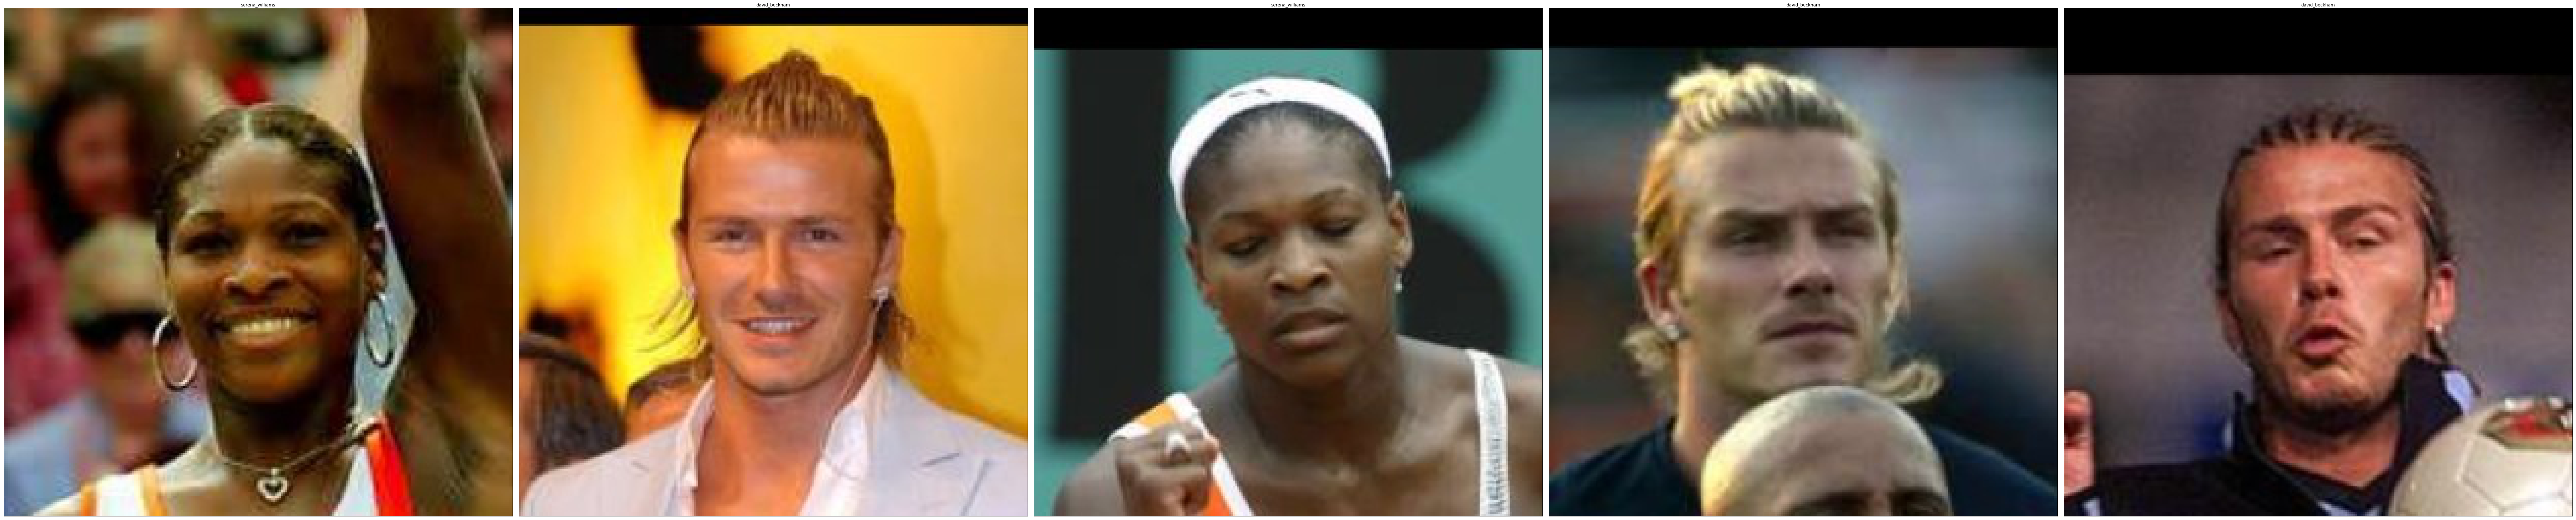

In [206]:
images, labels = get_samples(X, y)
show_side_by_side(images, figsize=(100,100), labels=labels) 

### Let's split our data into training and testing data

Obvioulsy, to do this properly we'd use more than just one person as this is going to overfit

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Let's view our train and testing data

In [208]:
[d for d in zip(X_train, y_train)]

[('../lfw/serena_williams/Serena_Williams_0024.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0047.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0004.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0010.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0041.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0015.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0003.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0013.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0027.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0014.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0051.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0006.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0010.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0040.jpg', 'serena_williams

In [209]:
[d for d in zip(X_test, y_test)]

[('../lfw/david_beckham/David_Beckham_0027.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0002.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0009.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0012.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0022.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0030.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0004.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0044.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0029.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0011.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0016.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0007.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0018.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0005.jpg', 'serena_williams'),
 ('../lfw/serena_williams/

### Now let's train Rekognition by copying our images to the S3 bucket

In [210]:
train(X_train, y_train, bucket_name)

../lfw/serena_williams/Serena_Williams_0024.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0047.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0004.jpg serena_williams
../lfw/david_beckham/David_Beckham_0010.jpg david_beckham
../lfw/serena_williams/Serena_Williams_0041.jpg serena_williams
../lfw/david_beckham/David_Beckham_0015.jpg david_beckham
../lfw/serena_williams/Serena_Williams_0003.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0013.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0027.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0014.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0051.jpg serena_williams
../lfw/david_beckham/David_Beckham_0006.jpg david_beckham
../lfw/serena_williams/Serena_Williams_0010.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0040.jpg serena_williams
../lfw/serena_williams/Serena_Williams_0025.jpg serena_williams
../lfw/david_beckham/David_Beckham_0014.jpg david_beckham


### Now let's test Rekognition to see how accurate it is
We'll use our test dataset for this

In [221]:
images, labels = get_samples(np.array(X_test), np.array(y_test))

In [235]:
def show_image(image):
    img = image.squeeze()
    plt.axis("off")
    plt.imshow(img, cmap='gray', interpolation='nearest')  # Manipulation to display image in the correct orientation!
    plt.show() 

Testing image ../lfw/david_beckham/David_Beckham_0027.jpg


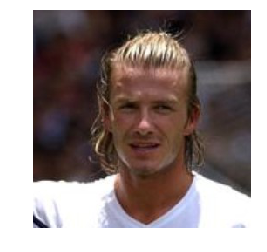

testing image ../lfw/david_beckham/David_Beckham_0027.jpg
Called rekognition...
{'SearchedFaceBoundingBox': {'Width': 0.4738461673259735, 'Height': 0.4738461673259735, 'Left': 0.2800000011920929, 'Top': 0.25846153497695923}, 'SearchedFaceConfidence': 99.9376449584961, 'FaceMatches': [], 'FaceModelVersion': '3.0', 'ResponseMetadata': {'RequestId': '2a52c18f-bf52-11e8-b29a-6bbf7febbad8', 'HTTPStatusCode': 200, 'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1', 'date': 'Sun, 23 Sep 2018 17:00:25 GMT', 'x-amzn-requestid': '2a52c18f-bf52-11e8-b29a-6bbf7febbad8', 'content-length': '220', 'connection': 'keep-alive'}, 'RetryAttempts': 0}}


In [236]:
for image, label in zip(X_test, y_test):
    print('Testing image {}'.format(image))
    img = load_image_as_array(image)
    show_image(img) 
    inferred = test(image)
    break